# Save and load results as HDF5 files

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [2]:
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                              grad=sp.optimize.rosen_der, 
                              hess=sp.optimize.rosen_hess)

dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Define history options and run optimization

In [28]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# save optimizer trace (to temporary file fn)
fn = tempfile.mktemp(".hdf5")
history_options = pypesto.HistoryOptions(trace_record=True, storage_file=fn)

# Run optimizaitons
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts, history_options=history_options)

In [29]:
result.optimize_result.list

[{'id': '11',
  'x': array([1.00000005, 1.00000002, 0.99999997, 0.99999994, 0.99999998,
         0.99999995, 0.99999987, 0.9999997 , 0.99999938, 0.99999876]),
  'fval': 2.7682066563449697e-12,
  'grad': array([ 3.56917101e-05,  6.21783821e-06, -1.29678566e-05, -3.54813057e-05,
          2.10642260e-05,  7.77788988e-06,  1.40060932e-05, -4.14461009e-06,
         -2.09261122e-06, -1.06297240e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 71,
  'n_grad': 71,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([1.00000005, 1.00000002, 0.99999997, 0.99999994, 0.99999998,
         0.99999995, 0.99999987, 0.9999997 , 0.99999938, 0.99999876]),
  'fval0': 81560.13716677667,
  'history': <pypesto.objective.history.Hdf5History at 0x12a5cdd30>,
  'exitflag': 0,
  'time': 0.2650890350341797,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '7',
  'x': array([1.00000002, 1.00000002, 0.99999996, 0.99999994, 1.00000002,
         1.        , 1.00000004,

## Plot results

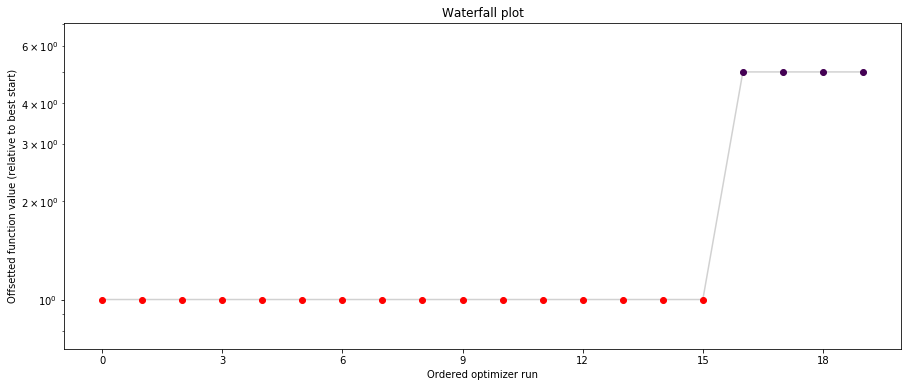

In [19]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Plot trace

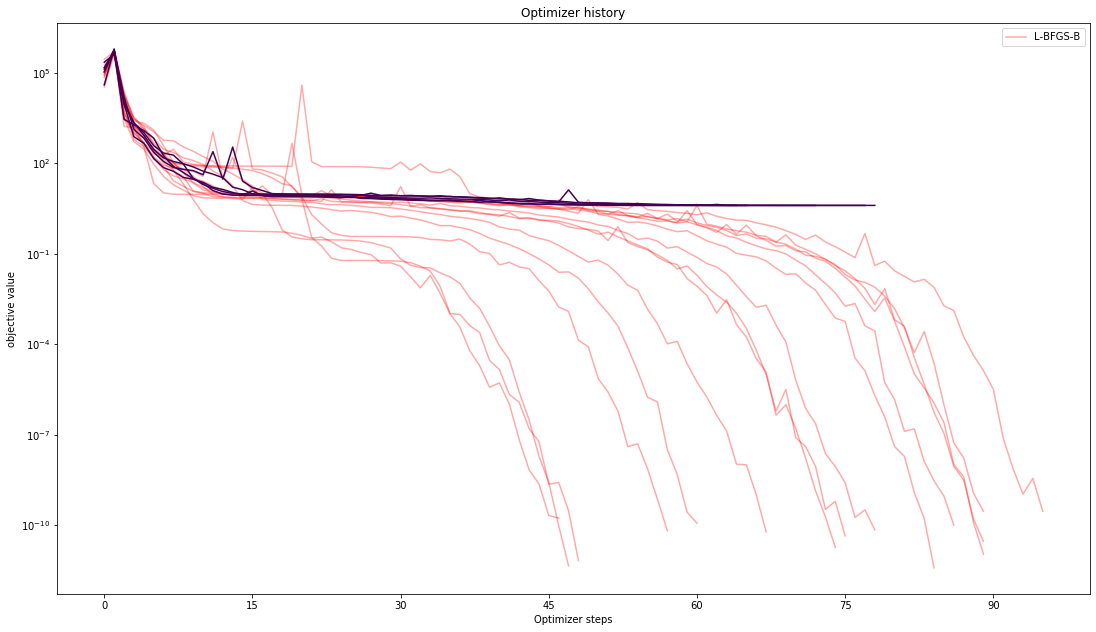

In [23]:
pypesto.visualize.optimizer_history(result,
                                    legends=['L-BFGS-B'])

## Save optimization result as HDF5 file

In [24]:
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

## Reload results

In [25]:
# Read result and problem
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

In [26]:
result.optimize_result.list

[{'id': '6',
  'x': array([0.99999999, 0.99999996, 0.99999996, 1.        , 0.99999992,
         0.99999989, 0.99999985, 0.99999981, 0.99999959, 0.9999992 ]),
  'fval': 3.876916587530421e-12,
  'grad': array([ 4.74249170e-06, -1.83388892e-05, -2.31891516e-05,  4.39123554e-05,
         -3.07140007e-05, -1.74172713e-05, -3.65503147e-05,  4.02846163e-05,
         -2.25797193e-05,  6.82685417e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 85,
  'n_grad': 85,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999999, 0.99999996, 0.99999996, 1.        , 0.99999992,
         0.99999989, 0.99999985, 0.99999981, 0.99999959, 0.9999992 ]),
  'fval0': 105515.07553734496,
  'history': None,
  'exitflag': 0,
  'time': 0.333834171295166,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '0',
  'x': array([0.99999997, 1.        , 0.99999995, 0.99999992, 0.99999993,
         0.99999989, 0.99999991, 0.99999986, 0.99999979, 0.99999966]),
  'fval': 4.5

## Plot (reloaded) results

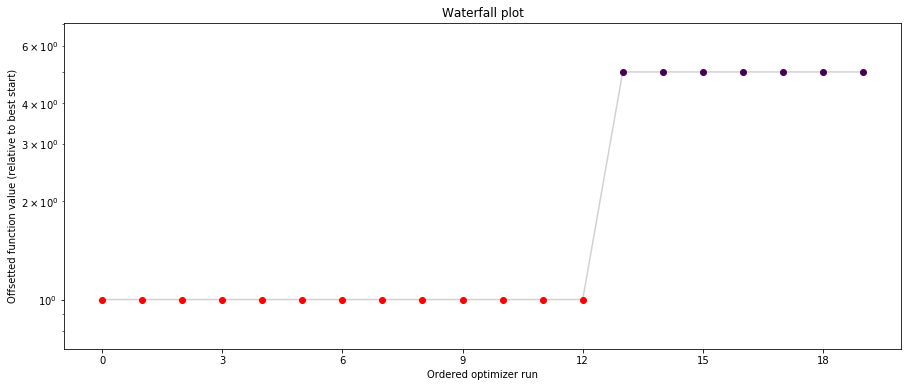

In [10]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

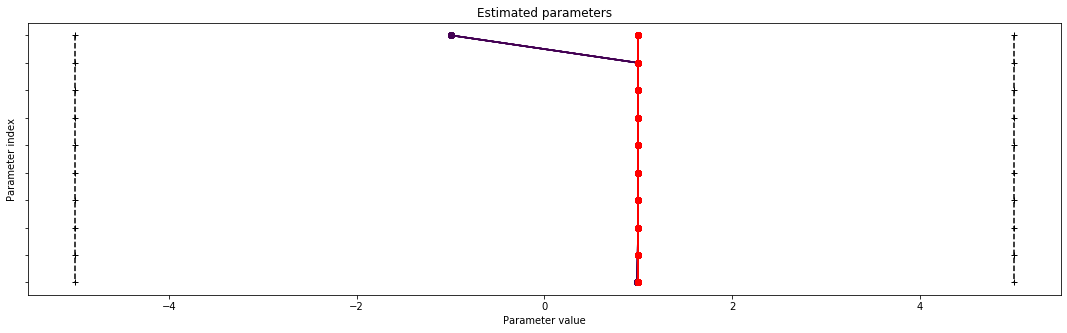

In [11]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)

In [44]:
result.optimize_result.list[1].history.get_x_trace()

[<Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 dataset>,
 <Closed HDF5 da

In [12]:
"""
pypesto.visualize.optimizer_history(result,
                                    legends=['L-BFGS-B'])
                                    """

AttributeError: 'NoneType' object has no attribute 'options'